# **10.1** 编程实现k近邻分类器，　在西瓜数据集3.0a上比较其分类边界与决策树分类边界的异同．　　 

直接用sklearn的knn吧. 

In [1]:
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
%matplotlib inline 


数据分布图


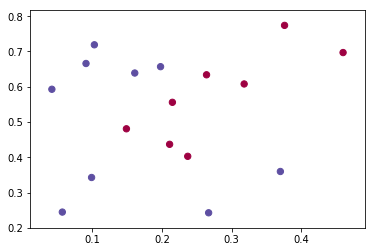

In [2]:
data = pd.read_csv('../data/watermelon3.0.csv')
data = data[['label', 'sugar', 'density']]
X = data[['sugar', 'density']].values
y = data['label']

print('数据分布图')
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


In [3]:
def plot_decision_boundary(pred_func):
 
    # 设定最大最小值，附加一点点边缘填充
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
    # 用预测函数预测一下
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
 
    # 然后画出图
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


## KNN算法 不同k取值的决策边界

k=1时的决策边界


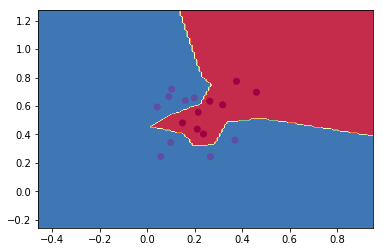

k=2时的决策边界


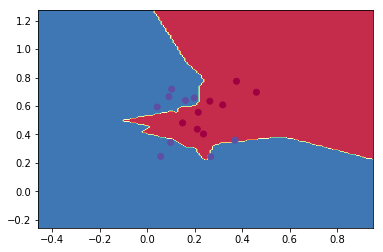

k=3时的决策边界


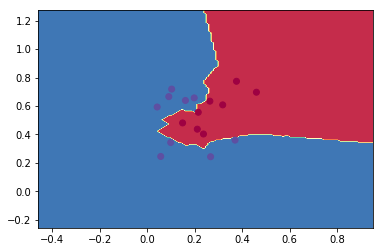

k=4时的决策边界


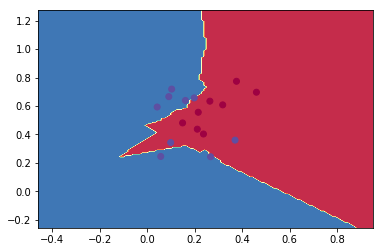

k=5时的决策边界


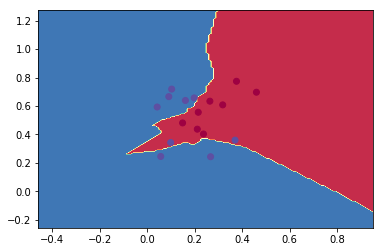

k=6时的决策边界


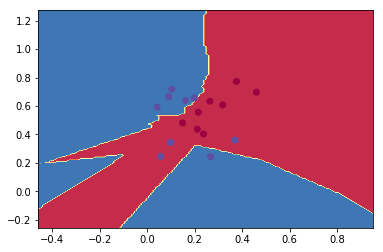

k=7时的决策边界


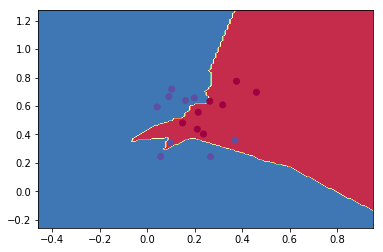

In [4]:
for i in range(1, 8):
    knnModel = KNeighborsClassifier(n_neighbors=i)
    knnModel.fit(X, y) 
    print("k=%d时的决策边界"%(i) )
    plot_decision_boundary(knnModel.predict)
    plt.show()




## 决策树的决策边界 

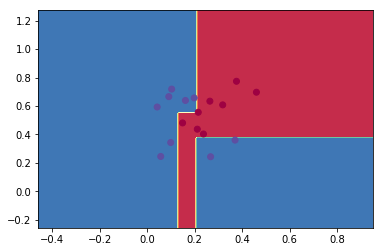

In [7]:
treeModel = DecisionTreeClassifier()
treeModel.fit(X, y)
plot_decision_boundary(treeModel.predict)